In [10]:
import requests
import json
import csv
from bs4 import BeautifulSoup
from modules.car_func import Web_scrape,DF_modify,Graph_breakdown
import traceback
import cloudscraper
import pandas as pd
import numpy as np
import seaborn as sns
from decimal import Decimal
from re import sub
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#leave as blank to include all within that range 
#postcode as 10 
#loation 1 is the area to buy the car and 2 is to sell 

make_buy="" 
model_buy="" 
postcode_buy="MK3 6JS" 
radius_buy=30
min_year_buy=2005 
max_year_buy=2010 
min_price_buy=10
max_price_buy = 10000

make_sell="" 
model_sell="" 
postcode_sell="DT1 3GJ" 
radius_sell=30
min_year_sell=2005 
max_year_sell=2010 
min_price_sell=10
max_price_sell = 10000


location_buy = retrieve_cars(make = make_buy, 
                           model = model_buy,
                           postcode = postcode_buy,
                           radius = radius_buy ,
                           min_year = min_year_buy ,
                           max_year = max_year_buy ,
                           min_price = min_price_buy,
                           max_price = max_price_buy,
                           location_type = 'buy' )

location_sell = retrieve_cars(make = make_sell, 
                           model = model_sell,
                           postcode = postcode_sell,
                           radius = radius_sell ,
                           min_year = min_year_sell ,
                           max_year = max_year_sell ,
                           min_price = min_price_sell,
                           max_price = max_price_sell,
                           location_type = 'sell' )

location_buy.to_csv('location_buy.csv')
location_sell.to_csv('location_sell.csv')


In [4]:
location_buy = pd.read_csv('location_buy.csv').drop('Unnamed: 0',axis = 1)
location_sell = pd.read_csv('location_sell.csv').drop('Unnamed: 0',axis = 1)

car_match = location_buy.merge(location_sell, how = 'inner', left_on = DF_modify.col_select(location_buy,['name','year']),
                       right_on = DF_modify.col_select(location_sell,['name','year']))

car_match = DF_modify.grouped_score(car_match,'index','buy_score')
car_match = DF_modify.grouped_score(car_match,'name_buy','score_by_name')
car_match = DF_modify.grouped_score(car_match,'brand_buy','score_by_brand')

In [6]:
#top 10 cars and urls
final_output = car_match.sort_values(by = 'buy_score' ,ascending= False)[['name_buy','price_buy','price_sell','postcode_buy','postcode_sell','mileage_buy','mileage_sell','engine_buy','engine_sell','buy_score','score_by_brand','score_by_name']]

In [11]:
Graph_breakdown.graph_breakdown(car_match,'brand_buy','score_by_brand',50)

NameError: name 'cf' is not defined

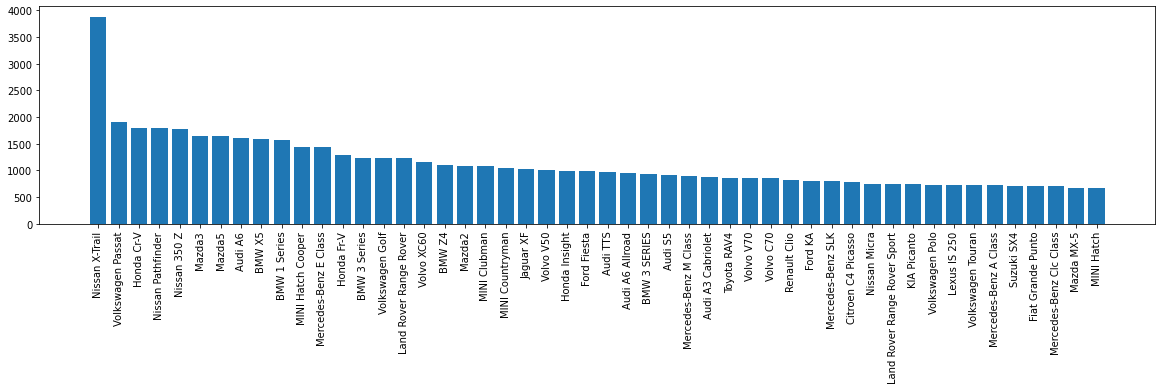

In [112]:
Graph_breakdown.graph_breakdown(car_match,'name_buy','score_by_name',50)